<a href="https://colab.research.google.com/github/marcelo-find-ai/logos/blob/main/Colab/Tutorial_Google_Colab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Como configurar o ambiente de desenvolvimento no Google Colab

1. Clique no ícone de chave na barra lateral esquerda
2. Agora clique em "add new secret"/"adicionar novo segredo"


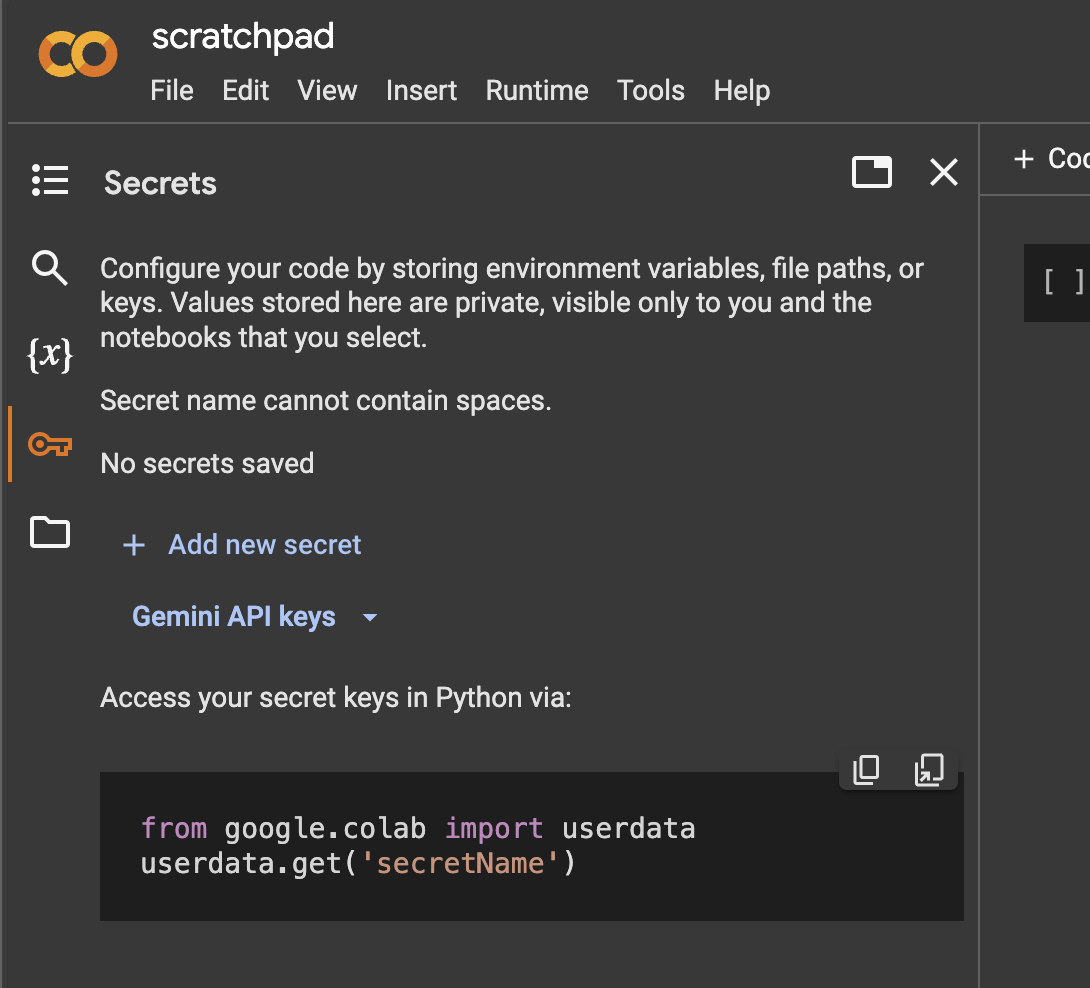

3. Adicione ali as variáveis `aws_access_key_id`, `aws_secret_access_key`, `region_name` e `endpoint_url` com os valores do seu arquivo de credenciais S3. Se você não tem este arquivo, solicite acesso ao Administrador do Sistema.

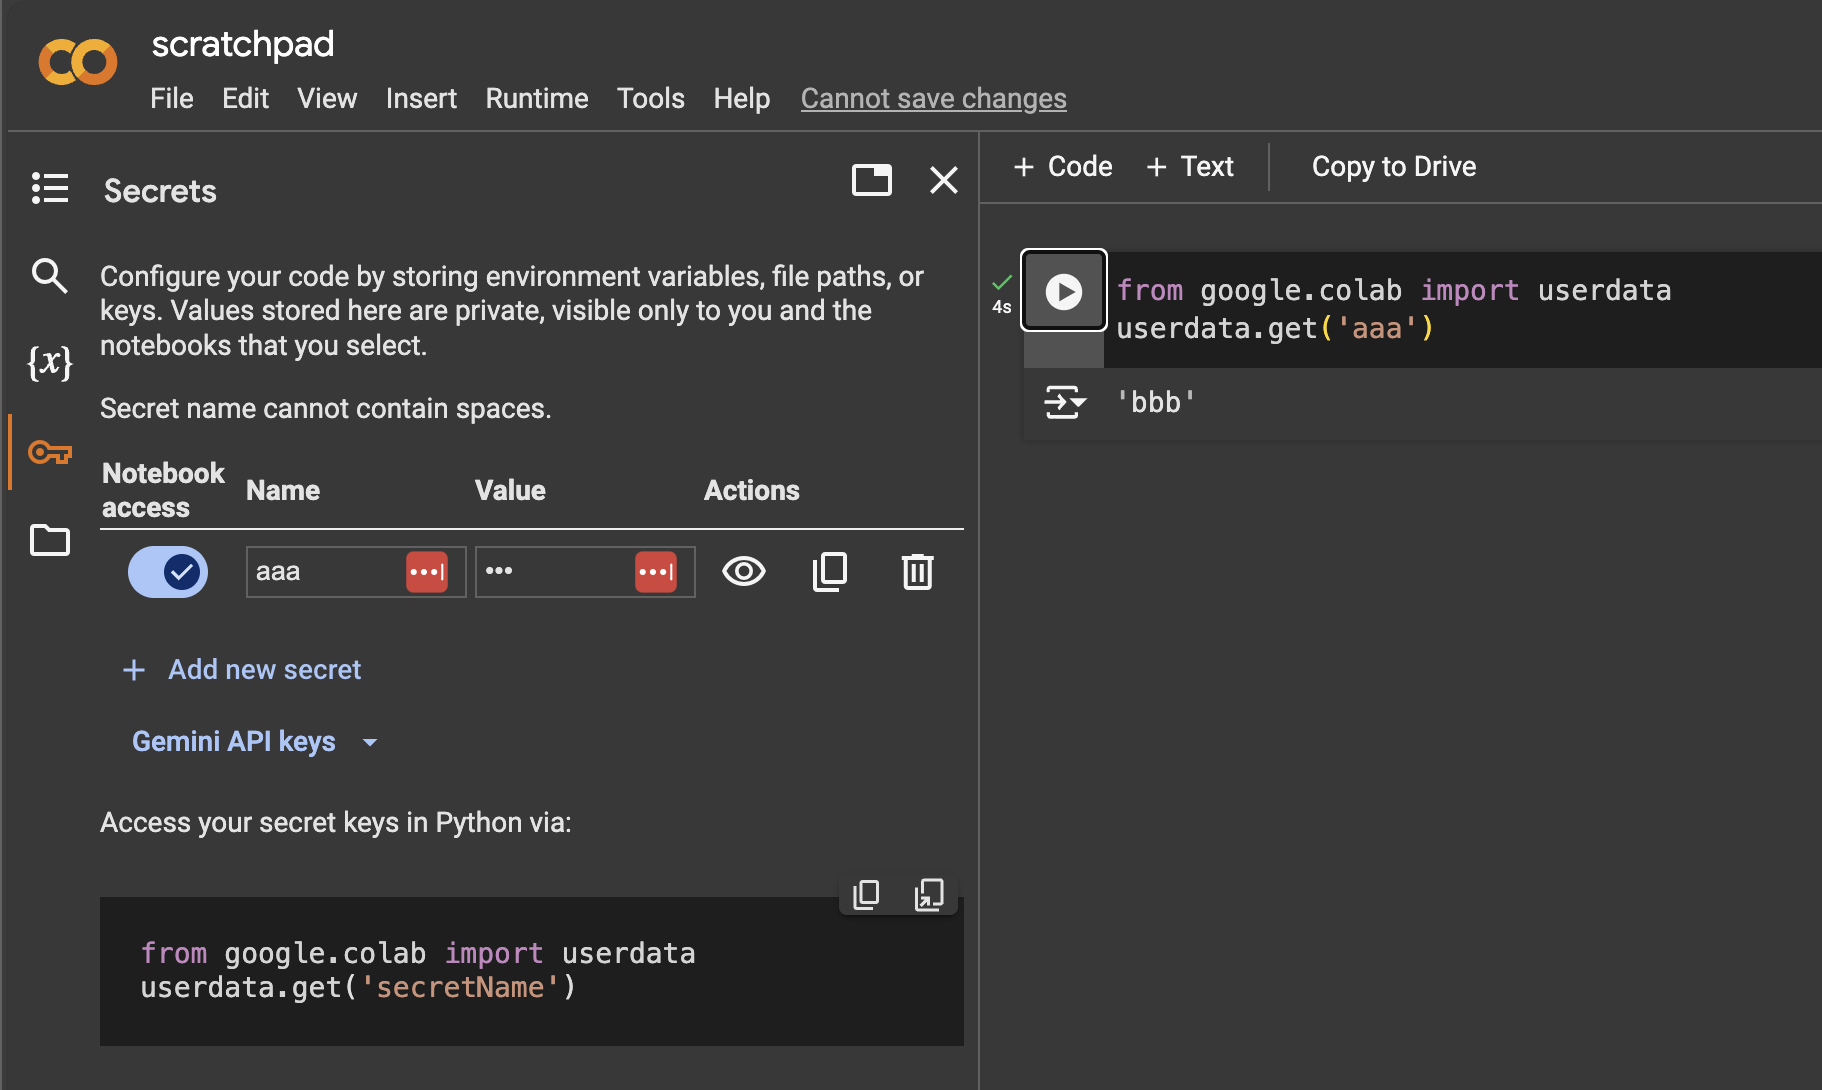

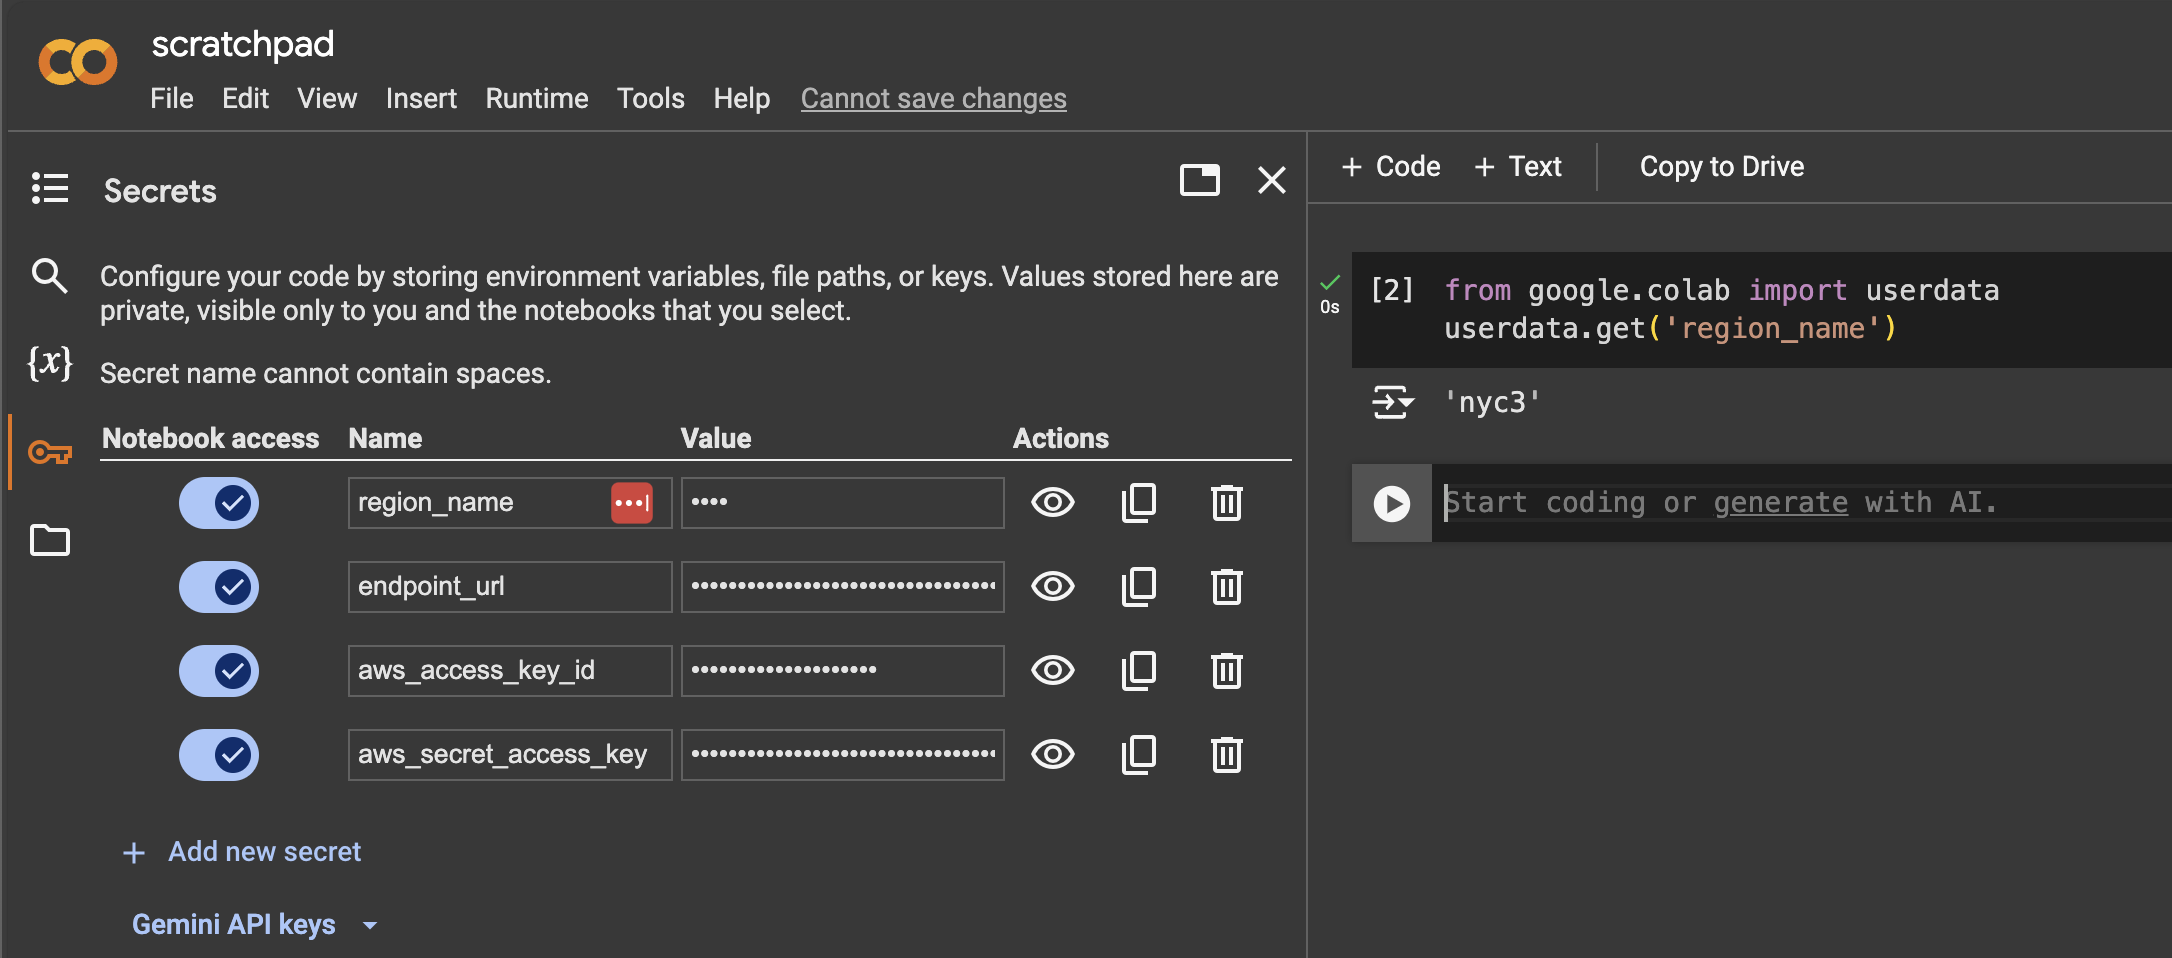

4. Agora, reinicie o ambiente de execução do Colab e rode o seguinte template para testar o acesso:

---

In [ ]:
# Instalar a lib s3fs
!pip install s3fs --quiet

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.4/77.4 kB 3.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.6/12.6 MB 53.3 MB/s eta 0:00:00


In [ ]:
import os
import pandas as pd
from google.colab import userdata

In [ ]:
# IMPORTANTE:
# Configurar aqui as variáveis de ambiente para acesso ao datalake Find AI
os.environ['AWS_ACCESS_KEY_ID'] = userdata.get('aws_access_key_id')
os.environ['AWS_SECRET_ACCESS_KEY'] = userdata.get('aws_secret_access_key')
os.environ['AWS_DEFAULT_REGION'] = userdata.get('region_name')
os.environ['AWS_ENDPOINT_URL'] = userdata.get('endpoint_url')

In [ ]:
# Lendo dados do datalake
dados =  "s3://find-ai-org-data/tmp/test_data.csv"

In [ ]:
df = pd.read_csv(dados)

In [ ]:
df

,id,data
0,1,abc
1,2,cde
2,3,efg


In [ ]:
novo_df = pd.concat([df, df])

In [ ]:
novo_df

,id,data
0,1,abc
1,2,cde
2,3,efg
0,1,abc
1,2,cde
2,3,efg


In [ ]:
# Salvando os dados no datalake:
novo_df.to_csv('s3://find-ai-org-data/tmp/novo_df.csv', index=False)

In [ ]:
# Pronto! Seus novos dados estão lá!
pd.read_csv('s3://find-ai-org-data/tmp/novo_df.csv')

,id,data
0,1,abc
1,2,cde
2,3,efg
3,1,abc
4,2,cde
5,3,efg
